Amsterdam House Price Prediction

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
#Creating Dataframe

df=pd.read_csv('/Users/apekshagyawali/Downloads/HousingPrices.csv')
df

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [5]:
df.head()


,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [6]:
df= df.drop('Unnamed: 0',axis=1)
df.head()


,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [7]:
print(df.shape)

(924, 7)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  924 non-null    object 
 1   Zip      924 non-null    object 
 2   Price    920 non-null    float64
 3   Area     924 non-null    int64  
 4   Room     924 non-null    int64  
 5   Lon      924 non-null    float64
 6   Lat      924 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 50.7+ KB


In [9]:
df.describe()

,Price,Area,Room,Lon,Lat
count,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,5.950000e+06,623.000000,14.000000,5.029122,52.423805


EDA

In [10]:
df.isnull().sum()

Address    0
Zip        0
Price      4
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

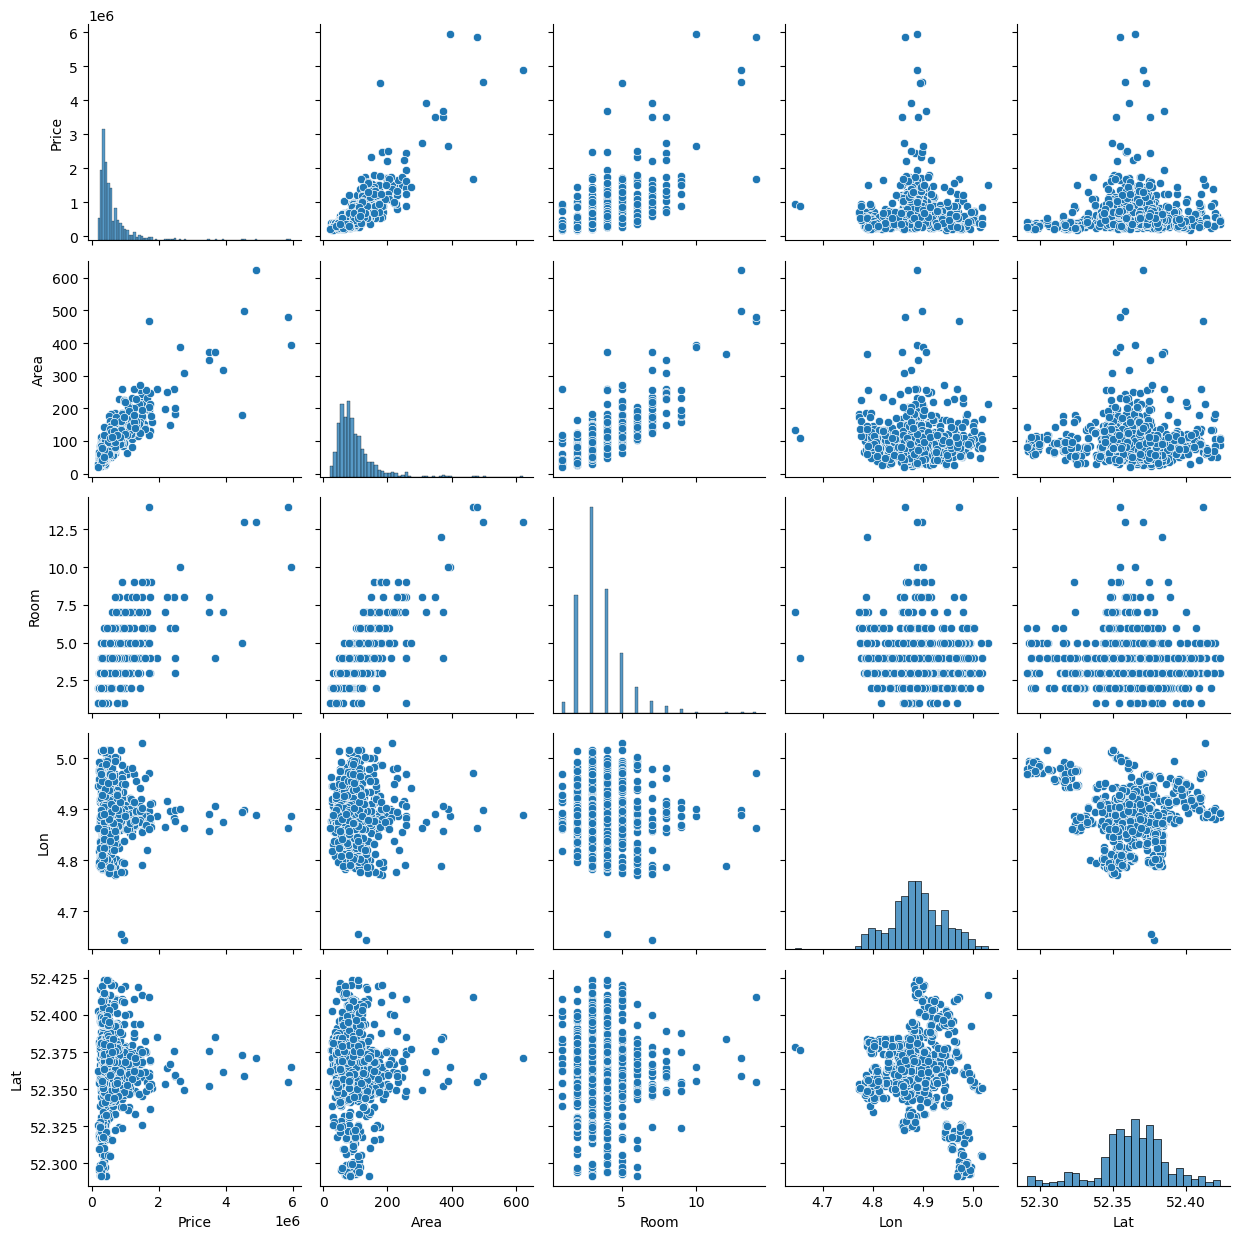

In [11]:
sns.pairplot(df, height=2.5)
plt.tight_layout()

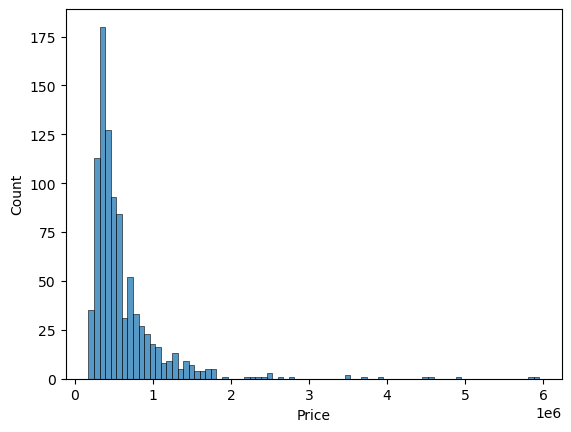

In [13]:
sns.histplot(df['Price']);

In [14]:
print("Skewness:%f" % df['Price'].skew())
print("Kurtosis:%f" % df['Price'].kurt())



Skewness:4.828817
Kurtosis:33.905643


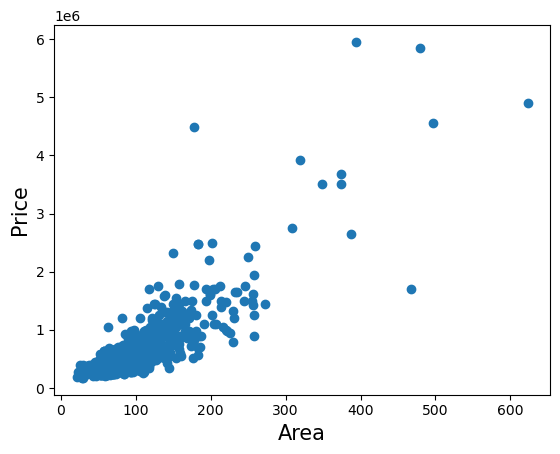

In [15]:
fig, ax=plt.subplots()
ax.scatter(x=df['Area'], y=df['Price'])
plt.ylabel('Price', fontsize=15)
plt.xlabel('Area', fontsize=15)
plt.show()

/Users/apekshagyawali/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: The data contains non-finite values.

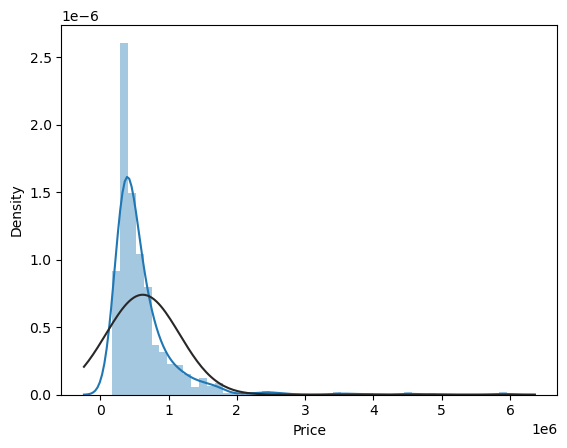

In [16]:
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(df['Price'], fit=norm);
(mu, sigma) = norm.fit(df['Price'])
print('\n mu={:.2f} and sigma={:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')
fig=plt.figure()
res=stats.probplot(df['Price'], plot=plt)
plt.show()

DATA CORELATION

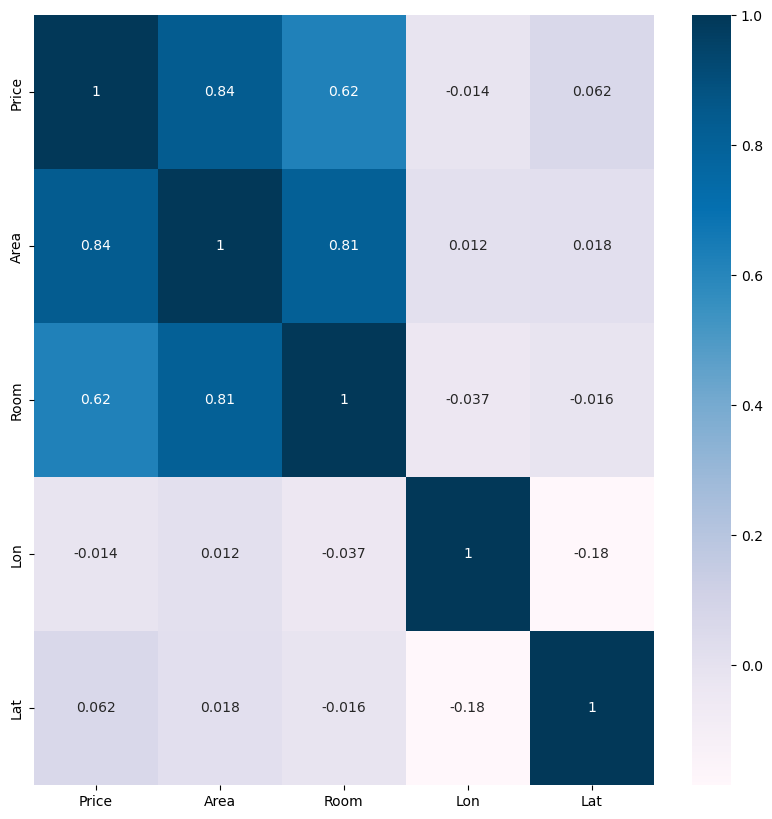

In [17]:
plt.figure(figsize=(10,10))
cor=df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [18]:
cor_target = abs(cor["Price"]) #absolute value of correlation
relevant_features = cor_target[cor_target>0.2] #highly correlated features
names =[index for index, value in relevant_features.iteritems()] #getting the names of the features
names.remove('Price') #removing target feature
print(names) #printing the features
print(len(names))

['Area', 'Room']
2


Model Building

In [19]:
df.columns

Index(['Address', 'Zip', 'Price', 'Area', 'Room', 'Lon', 'Lat'], dtype='object')

In [20]:
continuous_features = ['Area','Lon','Lat','Price']
discrete_features = ['Address','Zip','Room']

In [21]:
df1 = df[df.Price<3000000].drop(discrete_features, axis=1)

In [22]:
from sklearn.model_selection import train_test_split
x = df1.drop(['Price'], axis=1)
y = df1.Price
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(819, 3)
(92, 3)
(819,)
(92,)


In [24]:
from sklearn.linear_model import LinearRegression


In [25]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)


Text(0.5, 1.0, 'Actual Price Vs Prediction')

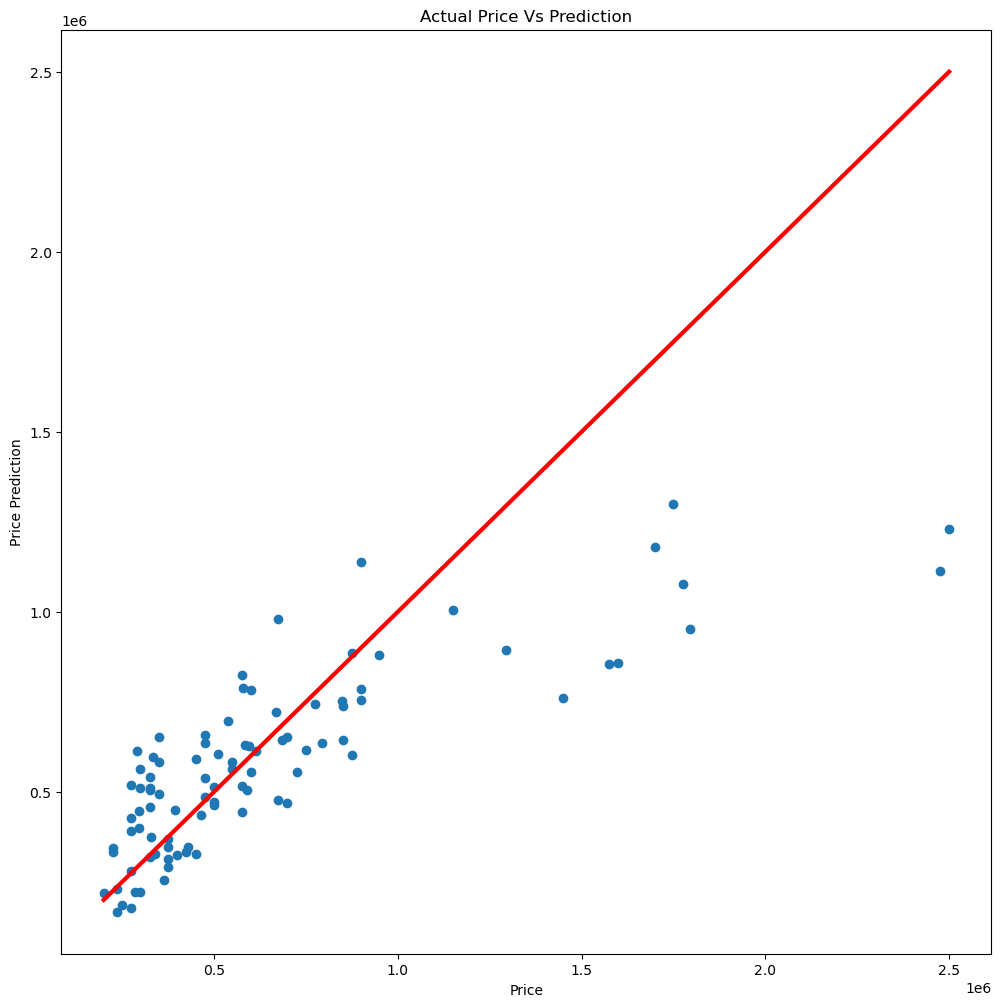

In [26]:
plt.figure(figsize=(12,12))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', linewidth=3)
plt.xlabel("Price")
plt.ylabel("Price Prediction")
plt.title("Actual Price Vs Prediction")

In [27]:
predictions=lr.predict(x_test)
print("actual value:-",y_test)
print("model predicted value:-", predictions)

actual value:- 196    325000.0
895    500000.0
114    465000.0
267    669000.0
680    375000.0
         ...   
618    550000.0
709    600000.0
655    325000.0
439    900000.0
669    300000.0
Name: Price, Length: 92, dtype: float64
model predicted value:- [ 458368.56276325  514016.20388051  437300.75956886  723223.48714937
  369405.19740652  343431.65591878  555140.48468905  951463.35936426
  612715.2334222   880432.31858397  636026.79946663  334014.98280897
 1299768.05764522  614189.04367691  280823.88503145  617642.36754623
  645124.55472434  428590.86921071  312844.61926572  592512.91617713
  636193.27948651  510691.99734759  469971.74363005  230404.87994207
  471720.84961726  398655.55382304  291910.9588904   348002.36941493
  659107.53264628  504989.90472934  445689.55667435  332479.01983211
  537365.02058033  256516.17273919 1076572.59136631  176327.43281919
  517608.59659178  787394.25756034  753463.63815266  755260.57527167
  584367.57522865 1138868.62522209  493503.37260965  39

In [31]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
print(mse)
print(rmse)

92268988164.13567
303758.1079808993
